# Figures of the Manuscript
_Note_: This Notebook loads cached final results from .pkl files (see './cache/'). Complete results (tracked history and MlFlow artifacts) can be loaded from MlFlow
by executing ('make_plot_bar.py', etc.)

## Results
### Main Barplot Comparison Figure

In [4]:
import sys
sys.path.insert(0, '..')
from gpflow.kernels import SquaredExponential, Matern52
from data.train_test_split import PositionSplitter, RandomSplitter, BioSplitter, OptimizationSplitter
from protocol_factories import FractionalSplitterFactory
from algorithms import GPonRealSpace, KNN, RandomForest, UncertainRandomForest
from util.mlflow.constants import ONE_HOT, EVE, EVE_DENSITY, TRANSFORMER, ESM, NO_AUGMENT
from util.mlflow.constants import MSE, SPEARMAN_RHO
from make_plot_bar import load_cached_results
from make_plot_bar import plot_metric_comparison_bar
from make_plot_bar import plot_metric_mutation_comparison
from visualization.plot_metric_for_uncertainties import plot_uncertainty_eval

#### Definitions 
Data, representations, algorithms and protocols over which to conduct the comparison.:

In [10]:
DATASETS = ["1FQG", "UBQT", "TIMB", "MTH3", "BRCA"]
REPRESENTATIONS = [ONE_HOT, EVE, EVE_DENSITY, TRANSFORMER, ESM]
RANDOM_SEEDS = [11, 42, 123, 54, 2345, 987, 6538, 78543, 3465, 43245]
ALGORITHMS = [GPonRealSpace().get_name(), GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(), GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(),
             RandomForest().get_name(), KNN().get_name()]
PROTOCOLS = [RandomSplitter("1FQG"), PositionSplitter("1FQG")]
METRICS = [MSE, SPEARMAN_RHO]

In [11]:
# Compare Embeddings (algorithm=Matern52 fixed):
plot_metric_comparison_bar(datasets=["1FQG",  "UBQT", "TIMB", "MTH3", "BRCA"],
                        reps=[ONE_HOT, EVE, EVE_DENSITY, TRANSFORMER, ESM],
                        metrics=METRICS,
                        train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")],
                        algos=[GPonRealSpace(kernel_factory=lambda: Matern52()).get_name()],
                        color_by="rep",
                        x_axis="rep",
                        cached_results=True)

AttributeError: 'NoneType' object has no attribute 'experiment_id'

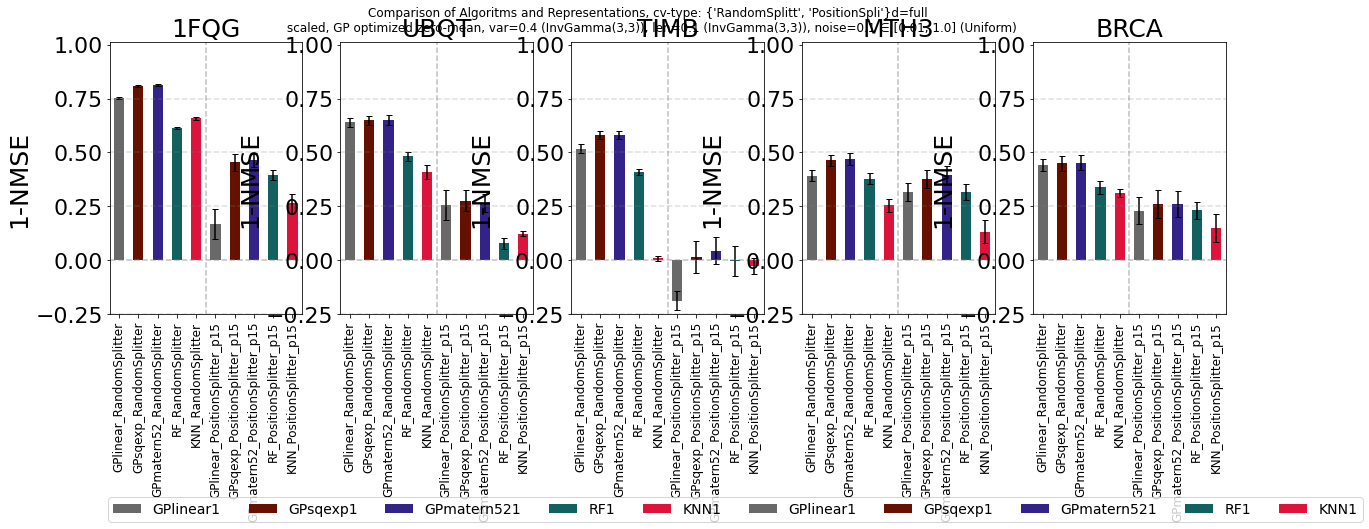

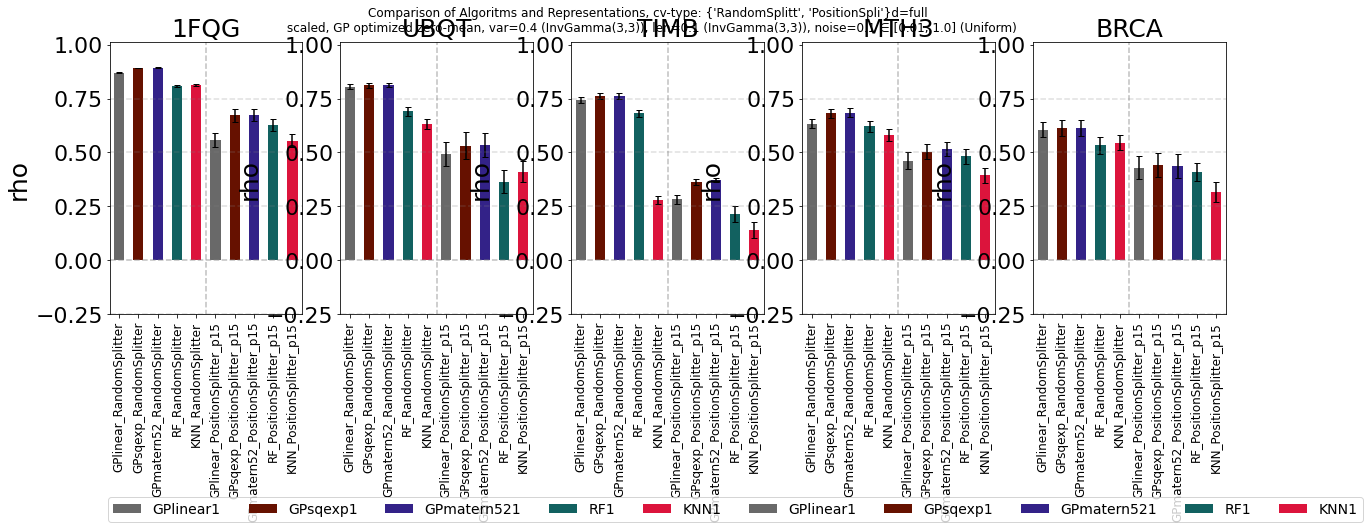

In [ ]:
# Compare Regressors (representation=ESM fixed):
plot_metric_comparison_bar(
    datasets=DATASETS,
    reps=[ESM],
    metrics=METRICS, 
    train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")],
    algos=ALGORITHMS,
    color_by="algo", x_axis="algo",
    cached_results=True,
)

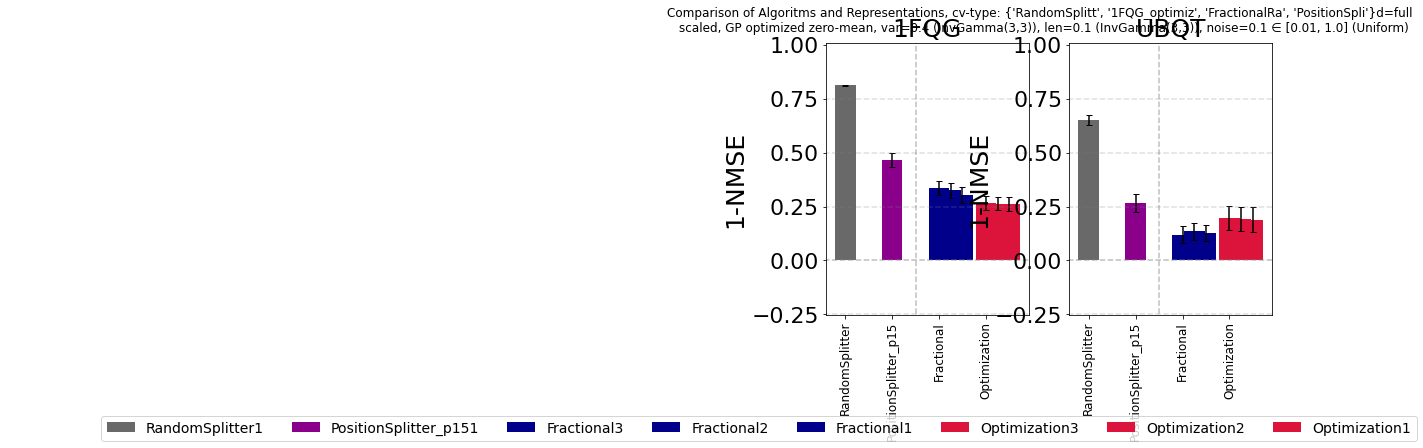

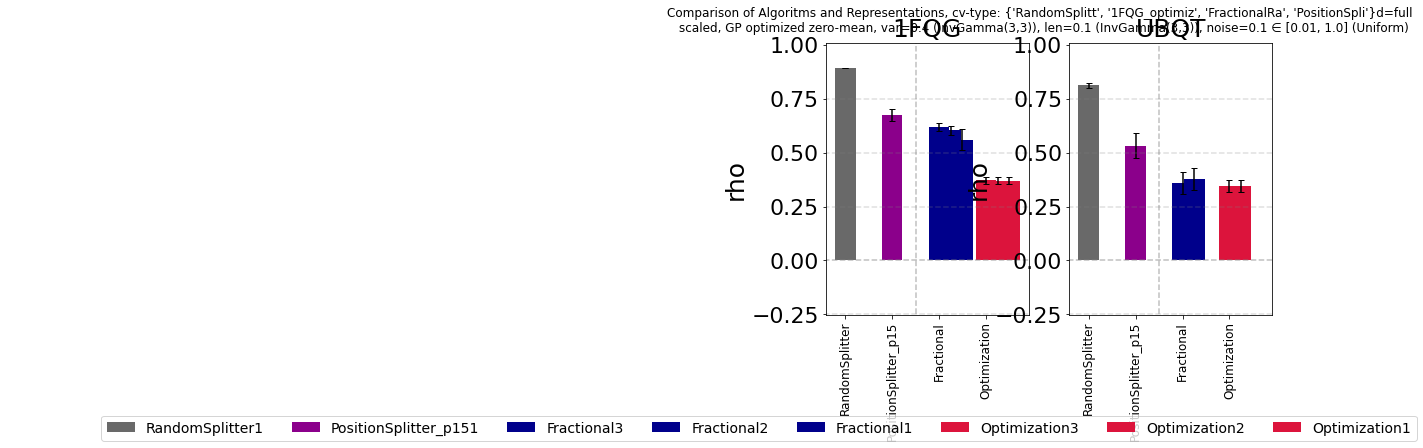

In [ ]:
# Compare splitters (representation and algorithm fixed):
fractional_splitters = FractionalSplitterFactory("1FQG")
all_splitters = [RandomSplitter("1FQG"), PositionSplitter("1FQG")] + fractional_splitters + [OptimizationSplitter("1FQG")]
plot_metric_comparison_bar(
    datasets=["1FQG", "UBQT"],
    reps=[ESM],
    metrics=METRICS,
    train_test_splitter=all_splitters,
    algos=[GPonRealSpace(kernel_factory= lambda: Matern52()).get_name()],
    color_by="task", x_axis="task",
    seeds=RANDOM_SEEDS, 
    cached_results=True,
)

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/Users/rcml/protein_regression/uncertainty_quantification/calibration.py:27: RuntimeWarning: invalid value encountered in double_scalars
  Sharpness = np.std(uncertainties, ddof=1)/np.mean(uncertainties)


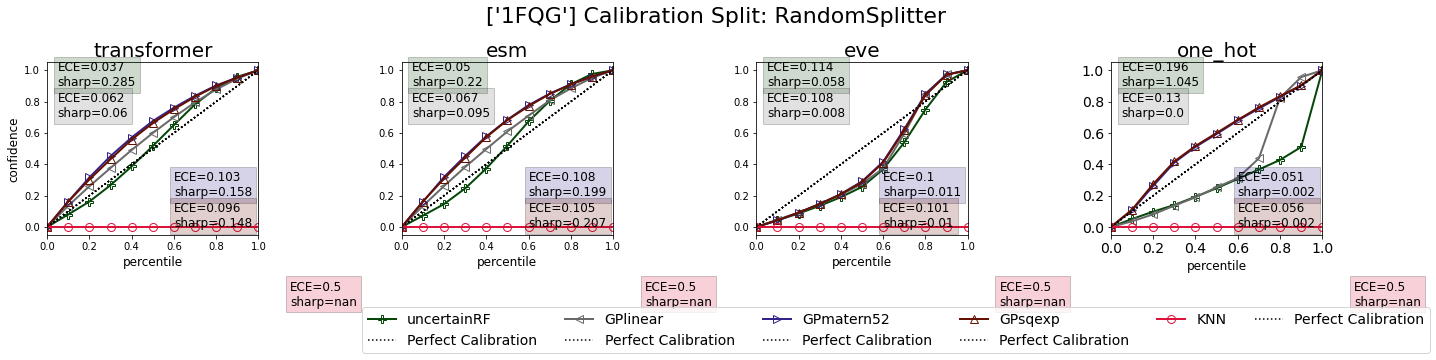

KeyError: 'n_estimators'

ValueError: 
\Chi^2
^
Unknown symbol: \Chi, found '\'  (at char 0), (line:1, col:1)

<Figure size 1440x360 with 4 Axes>

In [ ]:
# Assess Calibration on Random-Splitter
plot_uncertainty_eval(
    datasets=["1FQG"], 
    reps=[TRANSFORMER, ESM, EVE, ONE_HOT],
    algos=[UncertainRandomForest().get_name(), GPonRealSpace().get_name(),
        GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(), 
        GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(),
        KNN().get_name()], 
    train_test_splitter=RandomSplitter("1FQG"), 
    augmentations = [NO_AUGMENT], 
    number_quantiles=10, 
    optimize=True, 
    d=None, dim_reduction=None,
    cached_results=True,
)

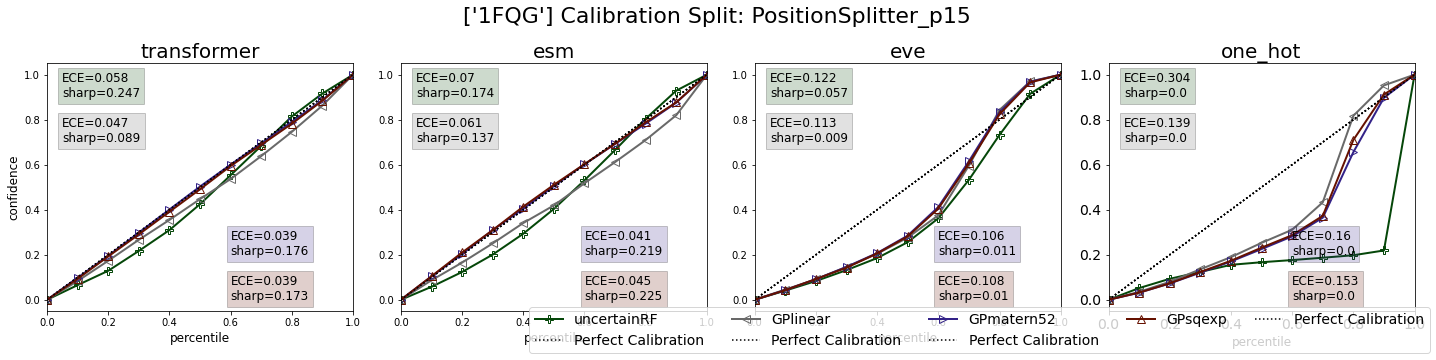

In [ ]:
# Assess Calibration on Position-Splitter
plot_uncertainty_eval(
    datasets=["1FQG"], 
    reps=[TRANSFORMER, ESM, EVE, ONE_HOT],
    algos=[UncertainRandomForest().get_name(), GPonRealSpace().get_name(),
        GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(), 
        GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(),
        KNN().get_name()], 
    train_test_splitter=PositionSplitter("1FQG"), 
    augmentations = [NO_AUGMENT], 
    number_quantiles=10, 
    optimize=True, 
    d=None, dim_reduction=None,
    cached_results=True,
)

#### Mutation Splitting Comparison

KeyError: 'mse'

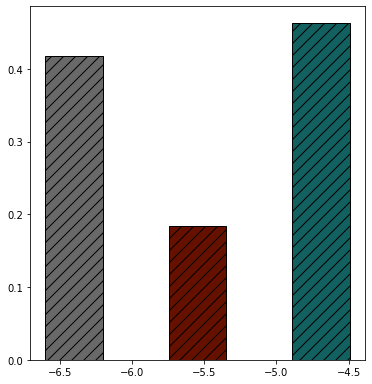

In [ ]:
plot_metric_mutation_comparison(
    datasets=["TOXI"],
    algos=[RandomForest().get_name()], 
    metrics=METRICS, 
    reps=[ONE_HOT, EVE, ESM],
    train_test_splitter=[BioSplitter("TOXI", 1, 2), BioSplitter("TOXI", 2, 2), BioSplitter("TOXI", 2, 3), BioSplitter("TOXI", 3, 3), BioSplitter("TOXI", 3, 4)],
    dimension=None, 
    dim_reduction=None,
    cached_results=True,
) # TODO: fix MSE plotting here